<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [40]:
import json
import pandas as pd
import spacy
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import os.path
from gensim import corpora, models
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chunghsinhsuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chunghsinhsuan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import pandas as pd
papers = pd.read_csv("clean_text_sentiment analysis.csv",encoding = "ISO-8859-1")
papers_data = papers['clean_text']
papers.head()

,document_id,clean_text,sentiment
0,1,purchas product advertis fulli unlock insert ...,negative
1,2,start that sad look like new,negative
2,3,bought refurbish i m assum open box item seem...,positive
3,4,phone initi bought one daughter end order one,positive
4,5,scratch damag matter part happi took plung bo...,positive


In [41]:
#preprocessing 
df['Lower Case'] = df['clean_text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
Tokenizer = RegexpTokenizer(r'\w+')
df['Tokenization'] = df['Lower Case'].apply(lambda x: Tokenizer.tokenize(x))
en_stop = set(nltk.corpus.stopwords.words('english'))
df['Tokens'] = df['Tokenization'].apply(lambda x: [i for i in x if not i in en_stop])
Stemmer = PorterStemmer()
df['Stemming'] = df['Tokens'].apply(lambda x: [Stemmer.stem(i) for i in x])

In [42]:
line = []
for i in range(0,len(df['Stemming'])):
    line+= df['Stemming'][i]
print(line)

['purcha', 'product', 'adverti', 'fulli', 'unlock', 'insert', 'card', 'work', 'contract', 'servic', 'provid', 'check', 'number', 'report', 'still', 'lock', 'origin', 'carrier', 'condit', 'use', 'servic', 'provid', 'start', 'sad', 'look', 'like', 'new', 'bought', 'refurbish', 'assum', 'open', 'box', 'item', 'seem', '100brand', 'recommend', 'seller', 'phone', 'initi', 'bought', 'one', 'daughter', 'end', 'order', 'one', 'scratch', 'damag', 'matter', 'part', 'happi', 'took', 'plung', 'bought', 'well', 'worth', 'far', 'capac', '100', 'lock', 'flicker', 'get', 'flurri', 'everyth', 'el', 'seem', 'fine', 'tri', 'start', 'work', 'honesti', 'greatli', 'appreci', 'day', 'deliv', 'exactli', 'promi', 'arriv', 'time', 'look', 'brand', 'everyth', 'work', 'smoothli', 'expect', 'unfortun', 'want', 'thrill', 'size', 'alway', 'like', 'larger', 'phone', 'contract', 'seller', 'refund', 'kindli', 'instruct', 'return', 'item', 'order', 'get', 'full', 'refund', 'back', 'card', 'far', 'complaint', 'definit', '

In [43]:
# Bigrams and Trigrams
Data = []
for line in df['Stemming']:
    Data.append(line)
    
bigram = models.Phrases(Data, min_count=5, threshold=100)
trigram = models.Phrases(bigram[Data], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[Data[0]]])

['purcha', 'product', 'adverti', 'fulli', 'unlock', 'insert', 'card', 'work', 'contract', 'servic', 'provid', 'check', 'number', 'report', 'still', 'lock', 'origin', 'carrier', 'condit', 'use', 'servic', 'provid']


In [45]:
##1##
# Features (top n-gram phrases) used for topic modeling
def Bigrams(Data):
    return [bigram_mod[doc] for doc in Data]
  
def Trigrams(Data):
    return [trigram_mod[bigram_mod[doc]] for doc in Data]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    output= []
    for i in Data:
        doc = nlp(" ".join(i)) 
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return output
Bigrams_Data = Bigrams(Data)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
Lemma = lemmatization(Bigrams_Data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(Lemma[:10])

[['purcha', 'product', 'adverti', 'card', 'work', 'contract', 'provid', 'check', 'number', 'report', 'still', 'lock', 'origin', 'carrier', 'condit', 'use', 'servic', 'provid'], ['start', 'sad', 'look', 'new'], ['buy', 'refurbish', 'assum', 'open', 'box', 'item', 'seem', 'recommend', 'seller'], ['phone', 'initi', 'buy', 'daughter', 'end', 'order'], ['scratch', 'take', 'buy', 'well', 'worth', 'far'], [], ['lock', 'flicker', 'get', 'flurri', 'seem', 'fine', 'tri', 'start', 'work'], ['look', 'brand', 'everyth', 'work', 'expect', 'unfortun', 'want', 'thrill', 'size', 'alway', 'large', 'phone', 'contract', 'seller', 'refund', 'kindli', 'instruct', 'return', 'item', 'order', 'get', 'full', 'refund', 'card', 'far', 'complaint', 'definit', 'busi', 'peopl'], ['look', 'amazon', 'renew', 'phone', 'week', 'skeptic', 'order', 'renew', 'decid', 'phone', 'see', 'phone', 'put', 'procrastin', 'order', 'hour', 'review', 'time', 'go', 'send', 'check', 'crack', 'day', 'deliv', 'see', 'day', 'concern', 'mak

In [46]:
id2word = corpora.Dictionary(Lemma)
Text1 = Lemma
corpus = [id2word.doc2bow(text) for text in Text1]
print(corpus[:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(17, 1), (18, 1), (19, 1), (20, 1)], [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)], [(23, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)], [(23, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)], [], [(6, 1), (16, 1), (20, 1), (28, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)], [(1, 1), (5, 1), (16, 1), (17, 1), (24, 1), (29, 1), (33, 1), (34, 1), (35, 1), (43, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1)], [(3, 1), (17, 2), (23, 1), (33, 2), (34, 3), (35, 2), (46, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 2), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87,

In [48]:
id2word[1]

'card'

In [49]:
id2word[0]

'adverti'

In [50]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]]

[[('adverti', 1),
  ('card', 1),
  ('carrier', 1),
  ('check', 1),
  ('condit', 1),
  ('contract', 1),
  ('lock', 1),
  ('number', 1),
  ('origin', 1),
  ('product', 1),
  ('provid', 2),
  ('purcha', 1),
  ('report', 1),
  ('servic', 1),
  ('still', 1),
  ('use', 1),
  ('work', 1)],
 [('look', 1), ('new', 1), ('sad', 1), ('start', 1)],
 [('assum', 1),
  ('box', 1),
  ('buy', 1),
  ('item', 1),
  ('open', 1),
  ('recommend', 1),
  ('refurbish', 1),
  ('seem', 1),
  ('seller', 1)],
 [('buy', 1),
  ('daughter', 1),
  ('end', 1),
  ('initi', 1),
  ('order', 1),
  ('phone', 1)],
 [('buy', 1),
  ('far', 1),
  ('scratch', 1),
  ('take', 1),
  ('well', 1),
  ('worth', 1)],
 [],
 [('lock', 1),
  ('work', 1),
  ('start', 1),
  ('seem', 1),
  ('fine', 1),
  ('flicker', 1),
  ('flurri', 1),
  ('get', 1),
  ('tri', 1)],
 [('card', 1),
  ('contract', 1),
  ('work', 1),
  ('look', 1),
  ('item', 1),
  ('seller', 1),
  ('order', 1),
  ('phone', 1),
  ('far', 1),
  ('get', 1),
  ('alway', 1),
  ('brand

In [51]:
data2 = ''
for i in range(0,len(df['clean_text'])):
    data2+= df['clean_text'][i]
print(data2)

nltk.download('punkt')
words = nltk.word_tokenize(data2)

Trigramss = nltk.trigrams(words)
freqT = nltk.FreqDist(Trigramss)
freqT

 purchas product advertis fulli unlock insert him card work contract servic provid check me number report still lock origin carrier condit couldn use servic provid  start that sad look like new  bought refurbish i m assum open box item seem 100brand recommend seller  phone initi bought one daughter end order one  scratch damag matter part happi took plung bought well worth far  capac 100  lock flicker get flurri everyth el seem fine tri start it work  honesti greatli appreci day deliv exactli promis arriv time look brand everyth work smoothli expect unfortun want thrill size alway like larger phone contract seller refund kindli instruct return item order get full refund back card far complaint definit busi peopl  look amazon renew phone coupl week skeptic order renew decid phone or saw phone 11 30 put procrastin order coupl hour partli review time decid go sinc could sent back check crack into day suppos deliv saw review post day becam concern made bad decis prepar disappoint arriv com

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chunghsinhsuan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FreqDist({('refurbish', 'i', 'm'): 2, ('arriv', 'time', 'look'): 2, ('him', 'card', 'exist'): 2, ('didn', 't', 'come'): 2, ('amazon', 'offer', 'refurbish'): 2, ('get', 'set', 'horizon'): 2, ('i', 'm', 'quit'): 2, ('m', 'quit', 'impress'): 2, ('purchas', 'product', 'advertis'): 1, ('product', 'advertis', 'fulli'): 1, ...})

In [53]:
##2##
# LDA model
# Top 10 clusters for topic modeling
lDmodel = models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics = 10, 
                                   random_state=100,update_every=1,chunksize=100,
                                   passes=10,alpha='auto',per_word_topics=True)
from pprint import pprint
pprint(lDmodel.print_topics())
IDM1 = lDmodel[corpus]

[(0,
  '0.036*"month" + 0.027*"day" + 0.027*"refurbish" + 0.027*"thank" + '
  '0.027*"offer" + 0.027*"amazon" + 0.018*"right" + 0.018*"go" + 0.018*"repay" '
  '+ 0.018*"phone"'),
 (1,
  '0.031*"come" + 0.023*"also" + 0.023*"do" + 0.023*"buy" + 0.023*"get" + '
  '0.023*"renew" + 0.023*"refurbish" + 0.016*"origin" + 0.016*"account" + '
  '0.016*"day"'),
 (2,
  '0.027*"phone" + 0.023*"get" + 0.023*"buy" + 0.022*"seller" + 0.018*"time" + '
  '0.018*"day" + 0.017*"far" + 0.014*"look" + 0.014*"horizon" + 0.014*"never"'),
 (3,
  '0.037*"charg" + 0.037*"problem" + 0.020*"well" + 0.020*"stop" + '
  '0.020*"support" + 0.020*"seem" + 0.020*"protector" + 0.020*"satisfi" + '
  '0.020*"snap" + 0.020*"aftermarket"'),
 (4,
  '0.055*"get" + 0.029*"spend" + 0.029*"anoth" + 0.029*"properli" + '
  '0.029*"return" + 0.003*"play" + 0.003*"go" + 0.003*"price" + 0.003*"night" '
  '+ 0.003*"entir"'),
 (5,
  '0.034*"work" + 0.023*"condit" + 0.023*"start" + 0.023*"pro" + '
  '0.023*"refund" + 0.023*"brand" + 0.0

In [54]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lDmodel.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lDmodel, texts=Lemma, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.211345844289929

Coherence Score:  0.43888770751572864


In [65]:
# LSA model
# Top 10 clusters for topic modeling
lSamodel = models.LsiModel(corpus, num_topics = 10, id2word = id2word)
pprint(lSamodel.print_topics(num_topics = 10))

[(0,
  '0.326*"phone" + 0.252*"month" + 0.246*"amazon" + 0.244*"get" + 0.224*"buy" '
  '+ 0.208*"day" + 0.187*"refurbish" + 0.169*"go" + 0.157*"charg" + '
  '0.156*"thank"'),
 (1,
  '-0.346*"month" + -0.257*"refurbish" + -0.243*"offer" + -0.241*"thank" + '
  '0.201*"order" + 0.199*"look" + 0.193*"day" + -0.184*"amazon" + '
  '0.184*"charg" + 0.183*"far"'),
 (2,
  '-0.391*"get" + -0.273*"seller" + 0.231*"phone" + -0.194*"anoth" + '
  '0.174*"order" + -0.161*"never" + -0.142*"day" + -0.136*"long" + '
  '-0.135*"buy" + -0.133*"time"'),
 (3,
  '-0.263*"account" + -0.239*"horizon" + -0.236*"never" + -0.201*"purcha" + '
  '-0.187*"phone" + 0.174*"day" + 0.172*"charg" + -0.162*"set" + 0.152*"go" + '
  '-0.138*"camera"'),
 (4,
  '-0.347*"boost" + -0.292*"work" + -0.281*"card" + -0.269*"back" + '
  '-0.231*"exist" + -0.180*"scratch" + -0.165*"say" + -0.145*"notic" + '
  '-0.139*"order" + 0.139*"concern"'),
 (5,
  '0.296*"origin" + -0.278*"seller" + 0.208*"use" + 0.193*"purcha" + '
  '-0.173*"an

In [ ]:
##3##
# Summarize and describe the topic for each cluster
'''
Topic1: Refurbish phones
Topic2: The age of the refurbished phones
Topic3: Negative reviews
Topic4: Charge functions
Topic5: Scratch on phones
Topic6: Camera functions
Topic7: Refund and return phones
Topic8: The problem of the refurbished phones
Topic9: The warranti of the refurbished phones
Topic10: The package and box of the refurbished phones
'''

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [62]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('clean_text_sentiment analysis.csv',encoding = "ISO-8859-1")
X = df['clean_text']
y = df['sentiment']

In [ ]:
##1##
# why I select these features
'''
Features used for sentiment classification are logistic regression and SVM.
I chose logistic regression and support vector machine algorithms because my dataset is very small. 
I chose SVM because its advantages are effective in high-dimensional spaces.
'''

In [64]:
##2##
# Select two of the supervised learning algorithm from scikit-learn library
# to build a sentiment classifier respectively
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Logistic Regression
vect = CountVectorizer(min_df=2, ngram_range=(1, 2))
X_train = vect.fit(X_train).transform(X_train) 
X_test = vect.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average = 'macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average = 'macro'))
print("f1 score:",metrics.f1_score(y_test, y_pred,average = 'macro'))

Accuracy: 0.5555555555555556
Precision: 0.2380952380952381
Recall: 0.2777777777777778
f1 score: 0.2564102564102564


In [63]:
# SVM
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
vect = CountVectorizer(min_df=2, ngram_range=(1, 2))
X_train = vect.fit(X_train).transform(X_train) 
X_test = vect.transform(X_test)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average = 'macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average = 'macro'))
print("f1 score:",metrics.f1_score(y_test, y_pred,average = 'macro'))

Accuracy: 0.5555555555555556
Precision: 0.35000000000000003
Recall: 0.38888888888888884
f1 score: 0.35353535353535354


In [ ]:
##3##
# Compare the performance over accuracy, precision, recall, and F1 score
'''
Logistic Regression
Accuracy: 0.5555555555555556
Precision: 0.2380952380952381
Recall: 0.2777777777777778
F1 score: 0.2564102564102564

SVM 
Accuracy: 0.5555555555555556
Precision: 0.35000000000000003
Recall: 0.38888888888888884
F1 score: 0.35353535353535354

I used two models Logistic Regression and SVM and did comparision of both model scores.
'''

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [20]:
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")
train_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [21]:
print(train_dataset.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [23]:
test_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [24]:
print(test_dataset.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


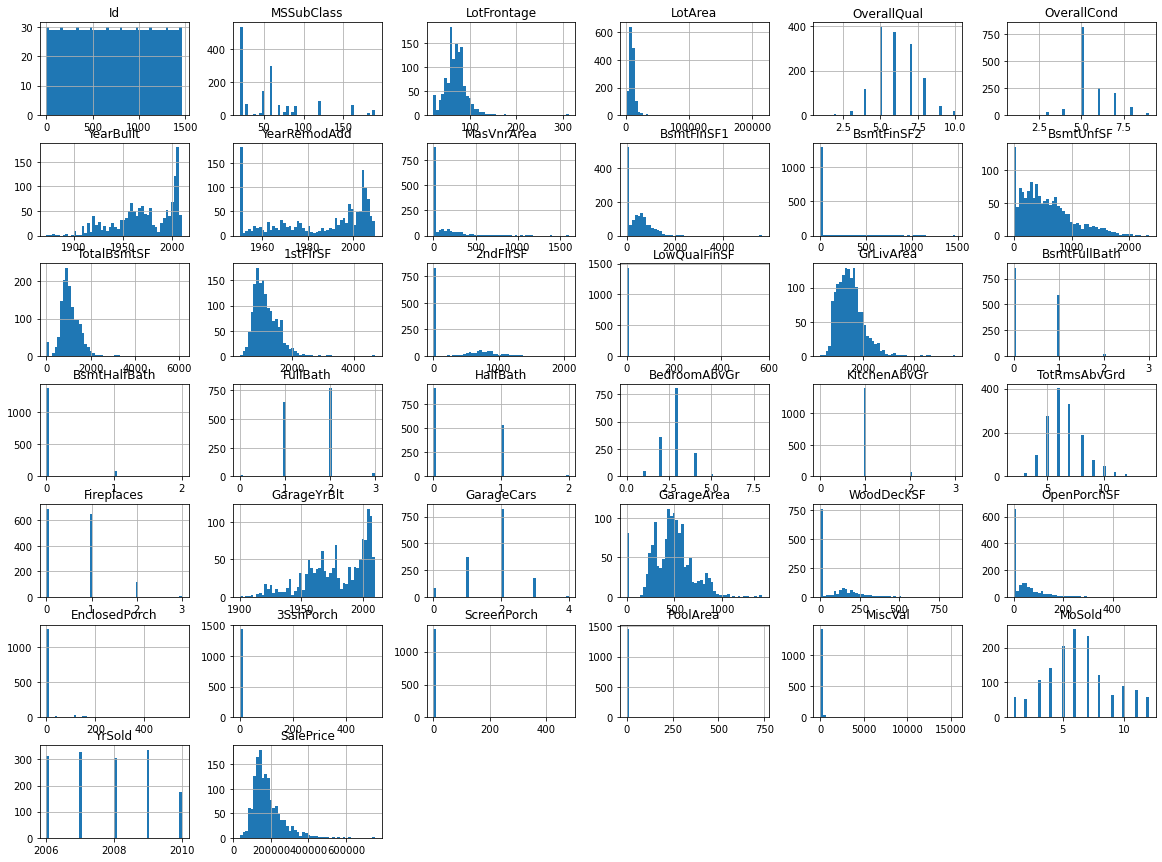

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
train_dataset.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [26]:
corr_matrix = train_dataset.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

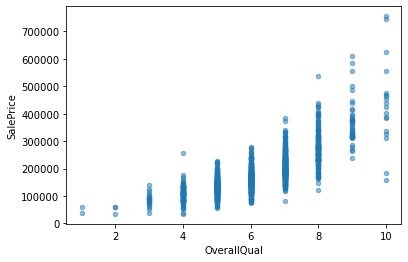

In [27]:
train_dataset.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

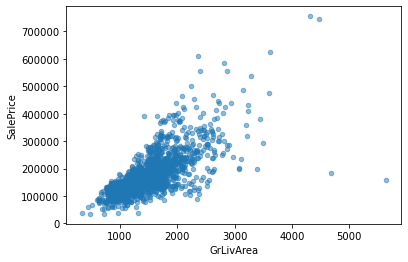

In [28]:
train_dataset.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

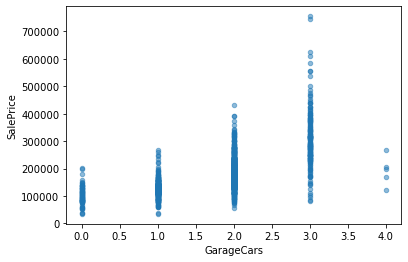

In [29]:
train_dataset.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)

<AxesSubplot:>

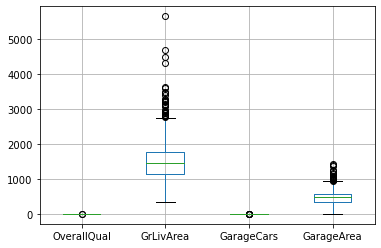

In [30]:
train_dataset.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

<AxesSubplot:>

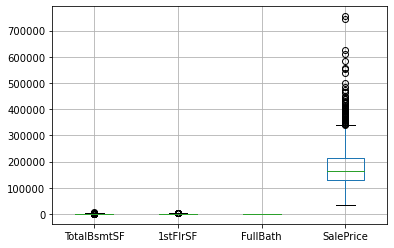

In [31]:
train_dataset.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

In [32]:
train_dataset.fillna(train_dataset.mean(), inplace = True)
test_dataset.fillna(test_dataset.mean(), inplace = True)
print(train_dataset.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [33]:
print(test_dataset.isnull().sum())

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


In [34]:
from sklearn.preprocessing import LabelEncoder
cols = ('GarageCond', 'RoofStyle', 'LandContour',  'Electrical', 'RoofMatl', 'Heating', 'Foundation', 'MiscFeature', 'SaleType', 'GarageType', 'SaleCondition', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for i in cols:
    end = LabelEncoder()
    end.fit(list(train_dataset[i].values))
    train_dataset[i] = end.transform(list(train_dataset[i].values))
x = train_dataset[train_dataset.columns[:80]]
y = train_dataset['SalePrice']    
from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x, y, test_size=0.2)
from sklearn.linear_model import LinearRegression
from sklearn import metrics

reg = LinearRegression()  
reg.fit(xtrain, ytrain)
values_predcited = reg.predict(xtest)
print("R-Square value of above linear Regression model : ", reg.score(xtrain,ytrain))

R-Square value of above linear Regression model :  0.845579033135055


In [35]:
sales_predict = pd.DataFrame(values_predcited, columns =['Predicted Sales'])
sales_predict

,Predicted Sales
0,90465.629425
1,185538.908360
2,178931.292919
3,324907.345591
4,146262.779169
...,...
287,239733.344117
288,119357.079019
289,372022.162504
290,131729.256076
